In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [58]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [59]:
train.shape , test.shape

((1460, 81), (1459, 80))

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

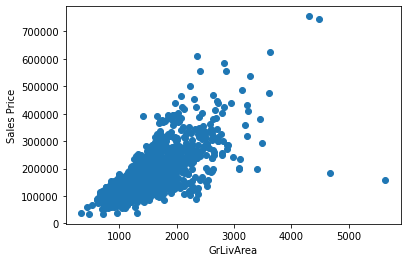

In [61]:
plt.scatter(train.GrLivArea, train.SalePrice)
plt.xlabel("GrLivArea")
plt.ylabel("Sales Price")
plt.show()

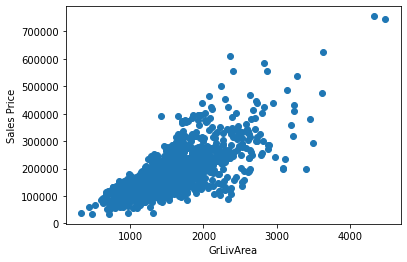

In [62]:
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)
plt.scatter(train.GrLivArea, train.SalePrice)
plt.xlabel("GrLivArea")
plt.ylabel("Sales Price")
plt.show()

In [63]:
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011121,-0.021955,-0.037689,-0.030213,0.012925,-0.013463,-0.022694,-0.053184,-0.015012,...,-0.030262,-0.002115,0.003103,-0.046600,0.001491,0.048476,-0.006195,0.023511,0.000378,-0.021673
MSSubClass,0.011121,1.000000,-0.405399,-0.142033,0.032522,-0.059275,0.027757,0.040503,0.022785,-0.074434,...,-0.012681,-0.006659,-0.012002,-0.043813,-0.026004,0.008090,-0.007675,-0.013581,-0.021386,-0.084276
LotFrontage,-0.021955,-0.405399,1.000000,0.388580,0.235266,-0.056437,0.116552,0.081427,0.163938,0.146986,...,0.081603,0.116992,0.015230,0.074539,0.046278,0.116320,0.004992,0.026139,0.007813,0.370584
LotArea,-0.037689,-0.142033,0.388580,1.000000,0.091392,-0.002723,0.007462,0.007500,0.084529,0.175320,...,0.168621,0.061861,-0.016505,0.021362,0.045288,0.036491,0.039072,0.005744,-0.013699,0.268179
OverallQual,-0.030213,0.032522,0.235266,0.091392,1.000000,-0.090442,0.571368,0.549827,0.403421,0.222467,...,0.236753,0.297186,-0.113176,0.030991,0.066298,0.044758,-0.031238,0.072531,-0.026575,0.795774
OverallCond,0.012925,-0.059275,-0.056437,-0.002723,-0.090442,1.000000,-0.375572,0.074615,-0.126669,-0.042987,...,-0.002675,-0.029800,0.070120,0.025426,0.054632,0.002321,0.068728,-0.003735,0.043795,-0.077948
YearBuilt,-0.013463,0.027757,0.116552,0.007462,0.571368,-0.375572,1.000000,0.592105,0.312832,0.249818,...,0.223700,0.184116,-0.387093,0.031578,-0.049972,-0.005171,-0.034273,0.012975,-0.013250,0.523608
YearRemodAdd,-0.022694,0.040503,0.081427,0.007500,0.549827,0.074615,0.592105,1.000000,0.175677,0.123039,...,0.204591,0.222790,-0.193551,0.045504,-0.038360,-0.003426,-0.010160,0.022020,0.036145,0.507717
MasVnrArea,-0.053184,0.022785,0.163938,0.084529,0.403421,-0.126669,0.312832,0.175677,1.000000,0.239168,...,0.156532,0.104809,-0.109421,0.019585,0.063476,-0.020570,-0.029649,-0.004238,-0.007097,0.482719
BsmtFinSF1,-0.015012,-0.074434,0.146986,0.175320,0.222467,-0.042987,0.249818,0.123039,0.239168,1.000000,...,0.204993,0.072717,-0.103853,0.029177,0.068389,0.052981,0.004741,-0.004281,0.015767,0.409384


In [64]:
c = train.corr().abs()
e = c['SalePrice']
d= c['SalePrice']>0.65
f = e[d]
f = pd.DataFrame(data=f)
f
print(f)

             SalePrice
OverallQual   0.795774
TotalBsmtSF   0.651153
GrLivArea     0.734968
SalePrice     1.000000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

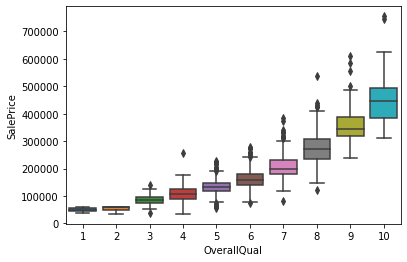

In [65]:
sns.boxplot(train.OverallQual, train.SalePrice)

In [66]:
input_cols = list(train.columns[1:80])
print(input_cols)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

In [67]:
target_col = train.columns[-1]

In [68]:
len(input_cols)

79

In [69]:
inputs_df = train[input_cols].copy()
targets = train[target_col]

In [70]:
numeric_cols = inputs_df.select_dtypes(include=["int64","float64"]).columns.tolist()
categoric_cols = inputs_df.select_dtypes(include='object').columns.tolist()

In [71]:
print(list(numeric_cols))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [72]:
print(list(categoric_cols))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [73]:
missing_counts = train[numeric_cols].isna().sum().sort_values(ascending=False)
print(missing_counts[missing_counts > 0])

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64


In [74]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(train[numeric_cols])
list(imputer.statistics_)

[50.0,
 69.0,
 9475.0,
 6.0,
 5.0,
 1972.5,
 1994.0,
 0.0,
 382.0,
 0.0,
 477.5,
 991.0,
 1086.0,
 0.0,
 0.0,
 1461.5,
 0.0,
 0.0,
 2.0,
 0.0,
 3.0,
 1.0,
 6.0,
 1.0,
 1980.0,
 2.0,
 479.5,
 0.0,
 24.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.0,
 2008.0]

In [75]:
print(len(imputer.statistics_) == len(numeric_cols)) , print(len(imputer.statistics_))

True
36


(None, None)

In [76]:
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])

In [77]:
missing_counts = inputs_df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts >0]

Series([], dtype: int64)

In [78]:
inputs_df[numeric_cols].describe().loc[['min','max']]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
min,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0
max,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,2188.0,1474.0,...,1390.0,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0


In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

In [80]:
inputs_df[numeric_cols].describe().loc[['min','max']]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [81]:
inputs_df[categoric_cols].nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
Functional        7
RoofMatl          7
BsmtFinType2      6
Heating           6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
GarageType        6
Foundation        6
Electrical        5
FireplaceQu       5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
ExterCond         5
BldgType          5
BsmtExposure      4
MiscFeature       4
Fence             4
LotShape          4
LandContour       4
BsmtCond          4
KitchenQual       4
MasVnrType        4
ExterQual         4
BsmtQual          4
LandSlope         3
GarageFinish      3
PavedDrive        3
PoolQC            3
Utilities         2
CentralAir        2
Street            2
Alley             2
dtype: int64

In [82]:
missing_counts = inputs_df[categoric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts >0]

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
FireplaceQu      690
GarageType        81
GarageCond        81
GarageQual        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
dtype: int64

In [83]:
inputs_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [84]:
list(categoric_cols)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [85]:
inputs_df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [86]:
categorical_cols = inputs_df.select_dtypes(include='object').columns.tolist()

In [87]:
list(categorical_cols)

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [88]:
missing_counts = inputs_df[categorical_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts >0]

GarageCond      81
GarageQual      81
GarageFinish    81
GarageType      81
BsmtExposure    38
BsmtFinType2    38
BsmtCond        37
BsmtFinType1    37
BsmtQual        37
MasVnrType       8
Electrical       1
dtype: int64

In [89]:
inputs_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [90]:
inputs_df = inputs_df.fillna(inputs_df.mode())
inputs_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,RL,0.150685,0.033420,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,WD,Normal
1,0.000000,RL,0.202055,0.038795,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,WD,Normal
2,0.235294,RL,0.160959,0.046507,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,WD,Normal
3,0.294118,RL,0.133562,0.038561,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,WD,Abnorml
4,0.235294,RL,0.215753,0.060576,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,WD,Normal


In [91]:
inputs_df.shape

(1458, 74)

In [92]:
inputs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1458 non-null   float64
 1   MSZoning       1458 non-null   object 
 2   LotFrontage    1458 non-null   float64
 3   LotArea        1458 non-null   float64
 4   Street         1458 non-null   object 
 5   LotShape       1458 non-null   object 
 6   LandContour    1458 non-null   object 
 7   Utilities      1458 non-null   object 
 8   LotConfig      1458 non-null   object 
 9   LandSlope      1458 non-null   object 
 10  Neighborhood   1458 non-null   object 
 11  Condition1     1458 non-null   object 
 12  Condition2     1458 non-null   object 
 13  BldgType       1458 non-null   object 
 14  HouseStyle     1458 non-null   object 
 15  OverallQual    1458 non-null   float64
 16  OverallCond    1458 non-null   float64
 17  YearBuilt      1458 non-null   float64
 18  YearRemo

In [93]:
inputs_df.notnull()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1456,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1458,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [94]:
print(targets)
targets_col = list(targets)
print(targets_col)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1458, dtype: int64
[208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000, 129500, 345000, 144000, 279500, 157000, 132000, 149000, 90000, 159000, 139000, 325300, 139400, 230000, 129900, 154000, 256300, 134800, 306000, 207500, 68500, 40000, 149350, 179900, 165500, 277500, 309000, 145000, 153000, 109000, 82000, 160000, 170000, 144000, 130250, 141000, 319900, 239686, 249700, 113000, 127000, 177000, 114500, 110000, 385000, 130000, 180500, 172500, 196500, 438780, 124900, 158000, 101000, 202500, 140000, 219500, 317000, 180000, 226000, 80000, 225000, 244000, 129500, 185000, 144900, 107400, 91000, 135750, 127000, 136500, 110000, 193500, 153500, 245000, 126500, 168500, 260000, 174000, 164500, 85000, 123600, 109900, 98600, 163500, 133900, 204750, 185000, 214000, 94750, 83000, 128950, 

In [97]:
print(len(targets_col))

1458


In [98]:
inputs_df.insert(74, 'SalePrice', targets_col, True)

In [99]:
inputs_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.235294,RL,0.150685,0.033420,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,WD,Normal,208500
1,0.000000,RL,0.202055,0.038795,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,WD,Normal,181500
2,0.235294,RL,0.160959,0.046507,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,WD,Normal,223500
3,0.294118,RL,0.133562,0.038561,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,WD,Abnorml,140000
4,0.235294,RL,0.215753,0.060576,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,WD,Normal,250000


In [100]:
inputs_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [104]:
inputs_df.dropna(axis=0, inplace=True)
inputs_df[categorical_cols].isna().sum().sort_values(ascending=False)

MSZoning         0
Electrical       0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
KitchenQual      0
Street           0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
BsmtQual         0
Foundation       0
ExterCond        0
ExterQual        0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
SaleCondition    0
dtype: int64

In [105]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse=False, handle_unknown='ignore')
onehot.fit(inputs_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [106]:
encoded_cols = list(onehot.get_feature_names(categorical_cols))
print(encoded_cols) , print(len(encoded_cols))

['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timbe

(None, None)

In [107]:
inputs_df[encoded_cols] = onehot.transform(inputs_df[categorical_cols])
inputs_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,RL,0.150685,0.033420,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,RL,0.202055,0.038795,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,RL,0.160959,0.046507,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,RL,0.133562,0.038561,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,RL,0.215753,0.060576,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,RL,0.140411,0.030929,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.000000,RL,0.219178,0.055505,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.294118,RL,0.154110,0.036187,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.000000,RL,0.160959,0.039342,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [111]:
if 'SalePrice' in inputs_df.columns:
    print('Present')
else:
    print('Not there')

Present


In [114]:
targets = inputs_df['SalePrice']
targets

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1336, dtype: int64

In [115]:
from sklearn.model_selection import train_test_split
train_inputs, valid_inputs, train_targets, valid_targets = train_test_split(inputs_df[numeric_cols + encoded_cols],
                                                                           targets,
                                                                           test_size=0.25,
                                                                           random_state=42)

In [116]:
train_inputs

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1302,0.235294,0.243151,0.041226,0.777778,0.500,0.884058,0.733333,0.244375,0.338208,0.00000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
991,0.294118,0.342466,0.076520,0.777778,1.000,0.072464,0.600000,0.000000,0.098720,0.00000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1114,0.000000,0.236301,0.019164,0.444444,0.750,0.594203,0.833333,0.000000,0.189671,0.00000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
197,0.323529,0.523973,0.112735,0.777778,0.375,0.333333,0.666667,0.000000,0.473492,0.12483,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
315,0.235294,0.171233,0.030358,0.666667,0.500,0.956522,0.916667,0.000000,0.194241,0.00000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,0.323529,0.150685,0.035289,0.666667,0.625,0.318841,0.000000,0.000000,0.000000,0.00000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1237,0.235294,0.068493,0.051850,0.666667,0.500,0.956522,0.916667,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1415,0.588235,0.102740,0.010914,0.666667,0.500,0.978261,0.950000,0.081250,0.451554,0.00000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
934,0.000000,1.000000,0.123162,0.666667,0.750,0.637681,0.950000,0.000000,0.194241,0.00000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [117]:
if 'SalePrice' in train_inputs.columns:
    print('Present')
else:
    print('Not there')

Not there


In [119]:
train_inputs.shape

(1002, 264)

In [118]:
train_targets 

1302    290000
991     168000
1114    117000
197     235000
315     188500
         ...  
1197    144000
1237    195000
1415    175900
934     242000
1231    132500
Name: SalePrice, Length: 1002, dtype: int64

In [121]:
valid_inputs

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
982,0.000000,0.075342,0.008797,0.666667,0.500,0.978261,0.950000,0.010000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1162,0.000000,0.301370,0.034701,0.444444,0.500,0.695652,0.300000,0.000000,0.224863,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1372,0.235294,0.184932,0.039496,0.666667,0.625,0.913043,0.800000,0.000000,0.445612,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
326,0.588235,0.037671,0.044619,0.777778,0.500,0.876812,0.716667,0.000000,0.739945,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
262,0.352941,0.229452,0.033518,0.555556,0.750,0.760870,0.750000,0.028750,0.231261,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,0.000000,0.167808,0.036622,0.666667,0.500,0.942029,0.883333,0.070625,0.370201,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1067,0.235294,0.202055,0.039543,0.555556,0.625,0.666667,0.233333,0.225000,0.308044,0.071913,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
730,0.588235,0.061644,0.019112,0.777778,0.500,0.891304,0.766667,0.000000,0.539305,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1209,0.000000,0.219178,0.041515,0.777778,0.500,0.971014,0.933333,0.262500,0.557587,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [122]:
valid_targets

982     159895
1162    129000
1372    274300
326     324000
262     151000
         ...  
337     214000
1067    167900
730     236500
1209    290000
1303    232000
Name: SalePrice, Length: 334, dtype: int64

In [135]:
from sklearn.linear_model import Ridge 
model = Ridge()
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)
valid_preds = model.predict(valid_inputs)
valid_preds

array([183595.8399564 , 124351.70997644, 253582.2399803 , 301118.50597798,
       141005.54254014, 308554.96924202, 183916.56786771, 310704.92218207,
       138818.34663502, 120332.57012779, 104847.58451823, 150605.11207177,
       211057.79881617, 166757.87700522,  80444.21878724, 226854.66142805,
       358602.69071239,  62337.39532695, 127560.01307216, 213556.29374016,
       268389.77999459, 155301.33044986, 110673.24721165, 281133.84374944,
       270619.5585939 , 116534.26819709, 129807.75972307, 143034.21108511,
       196037.40841088, 241322.27675271, 184493.35165776, 227841.39665838,
       184475.75958763, 239196.54658711, 115802.77340816, 203768.75533403,
       184531.5380473 , 161414.45001784, 272083.64068465,  90140.05550706,
       231714.40900787, 100956.39267053,  46218.49915112, 127089.84588748,
       132843.15380266, 127952.59043382, 222755.05442471, 122031.04483355,
       257937.98828839, 123594.41883884, 128888.81380094, 236010.09087663,
       151969.58220855,  

In [130]:
from sklearn.metrics import mean_squared_error
train_preds = model.predict(train_inputs[numeric_cols + encoded_cols])
train_preds

array([310117.17013592, 159768.22132713, 119011.23387323, ...,
       206318.04393306, 243134.32405381, 121157.49933072])

In [131]:
train_rmse = mean_squared_error(train_targets,train_preds,squared=False )

In [132]:
print('The RMSE loss for the training set is $ {}.'.format(train_rmse))

The RMSE loss for the training set is $ 20049.12987954641.


In [138]:
valid_rsme = mean_squared_error(valid_targets, valid_preds,squared=False)

In [139]:
print("The RSME loss for the validation set is $ {}.".format(valid_rsme))

The RSME loss for the validation set is $ 25127.905363633483.


In [142]:
weights = model.coef_
weights_df = pd.DataFrame({'columns' : train_inputs.columns,
                           'weight' : weights}).sort_values('weight', ascending=False)
weights_df

,columns,weight
15,GrLivArea,87002.104522
2,LotArea,86523.340102
12,1stFlrSF,72232.600241
13,2ndFlrSF,71603.273281
3,OverallQual,52783.599908
...,...,...
20,BedroomAbvGr,-19769.209102
91,Condition1_RRAe,-20005.626049
41,Street_Grvl,-20136.237657
126,RoofMatl_Tar&Grv,-25565.412794


In [143]:
categorical_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [144]:
import joblib 
house_price_predictor = {
    'model' : model,
    'imputer' : imputer,
    'scaler' : scaler,
    'encoder' : onehot,
    'input_cols' : input_cols,
    'target_col' : target_col,
    'numeric_cols' : numeric_cols,
    'categorical_cols' : categorical_cols,
    'encoded_cols' : encoded_cols
}
joblib.dump(house_price_predictor, 'house_price_predictor.joblib')

['house_price_predictor.joblib']

In [173]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [174]:
test[categorical_cols].isna().sum().sort_values(ascending=False)

GarageCond       78
GarageQual       78
GarageFinish     78
GarageType       76
BsmtCond         45
BsmtExposure     44
BsmtQual         44
BsmtFinType1     42
BsmtFinType2     42
MasVnrType       16
MSZoning          4
Functional        2
Utilities         2
KitchenQual       1
Exterior1st       1
Exterior2nd       1
SaleType          1
CentralAir        0
HeatingQC         0
Heating           0
PavedDrive        0
Electrical        0
Foundation        0
Street            0
ExterCond         0
ExterQual         0
RoofMatl          0
RoofStyle         0
HouseStyle        0
BldgType          0
Condition2        0
Condition1        0
Neighborhood      0
LandSlope         0
LotConfig         0
LandContour       0
LotShape          0
SaleCondition     0
dtype: int64

In [175]:
test_final = test[categorical_cols + numeric_cols]
test[numeric_cols].isna().sum().sort_values(ascending=False)

LotFrontage      227
GarageYrBlt       78
MasVnrArea        15
BsmtHalfBath       2
BsmtFullBath       2
TotalBsmtSF        1
GarageCars         1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
GarageArea         1
OpenPorchSF        0
WoodDeckSF         0
MSSubClass         0
EnclosedPorch      0
TotRmsAbvGrd       0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
Fireplaces         0
FullBath           0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

In [176]:
test_final[numeric_cols] = imputer.transform(test_final[numeric_cols])
test_final[numeric_cols] = scaler.transform(test_final[numeric_cols])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [177]:
test_final[numeric_cols].isna().sum().sort_values(ascending=False)

MSSubClass       0
LotFrontage      0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFinSF1       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF2       0
BsmtFullBath     0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
YrSold           0
dtype: int64

In [178]:
ID = test['Id']
test_final.insert(0, 'Id', ID, True)
test_final.dropna(axis=0, inplace=True)
test_final[categorical_cols].isna().sum().sort_values(ascending=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


MSZoning         0
Electrical       0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
KitchenQual      0
Street           0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
BsmtQual         0
Foundation       0
ExterCond        0
ExterQual        0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
SaleCondition    0
dtype: int64

In [179]:
test_final.shape

(1319, 75)

In [180]:
test_final[encoded_cols] = onehot.transform(test_final[categorical_cols].values)
X_input = test_final[numeric_cols + encoded_cols]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [181]:
test_final

,Id,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1462,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1463,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1464,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1465,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2912,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1452,2913,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1455,2916,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,2917,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [182]:
test_preds = model.predict(X_input)
output = {'id': test_final['Id'],
          'SalePrice': test_preds}

In [184]:
out_df = pd.DataFrame(output)
out_df

,id,SalePrice
0,1461,112782.708224
1,1462,168232.470413
2,1463,187767.002266
3,1464,196363.390515
4,1465,195526.802342
...,...,...
1451,2912,145433.826099
1452,2913,61524.155091
1455,2916,67644.477111
1456,2917,176688.061520


In [185]:
out_df.to_csv('output.csv', index=False)